# Pandas Deep Dive by Dmitry Zarubin
The purpose of this introduction is to give an idea about the some tricks and methods of Pandas library. Pandas is a powerful, open source Python package for data analysis, manipulation, and visualization. When used approprietly it can significantly speed up development process and reduce amount of code you are creating. This short deep dive is based on my previous experience and Pandas documentation.

## Creating DataFrames

Pandas primary Data Structures:

A *Series* is a one-dimensional array object, which contains containing an data of any NumPy data type. It also has  an associated array of data labels, called its index.    

A *DataFrame* represents a spreadsheet-like data structure, which contains a collection of columns. Data Frames are essentially tabular data structures with labeled axes.  Each column can be of a different value type e.g. string, numeric, boolean. You can think of it as a Dictionary of Series

Let's load a toy dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
print(type(iris.data)) # the source can be numpy array

<class 'numpy.ndarray'>


In [4]:
my_dict = {'a':1,'b':2}
df = pd.DataFrame.from_dict(data=my_dict, orient = 'index',columns =['value']) # or a dictionary
df

,value
a,1
b,2


It is sometimes helpful to think about DataFrames as matrices and about columns as vectors. 

Applying some matrix transformation operations like transposition is possible in Pandas.

In [5]:
df.transpose()

,a,b
value,1,2


The source can also be a list :

In [6]:
my_list = [['a','b',55]]*4
df = pd.DataFrame(data=my_list, columns =['value1','value2','value3']) # or a list
df

,value1,value2,value3
0,a,b,55
1,a,b,55
2,a,b,55
3,a,b,55


One could read DataFrame from a spreadsheet file - e.g. read_csv or read_excel. It is also possible to create DataFrames from varios SQL databases using SQLAlchemy library.

## Map and Apply

MAP and APPLY methods are used to call custom functions on a whole DataFrame or on a single column.
One way to modify a single column is to implement a lambda function within MAP. It is of course possible to give an external function as a parameter for map, but in my opinion it is much easier to understand the code with lambdas.

In [7]:
iris_df['sepal length (cm)'] = iris_df['sepal length (cm)'].map(lambda x: 2*x)
iris_df['sepal width (cm)'] = iris_df['sepal width (cm)'].map(lambda x: str(x)+' cm' )
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,10.2,3.5 cm,1.4,0.2
1,9.8,3.0 cm,1.4,0.2
2,9.4,3.2 cm,1.3,0.2
3,9.2,3.1 cm,1.5,0.2
4,10.0,3.6 cm,1.4,0.2


We strongly recommend to avoid using iterators over rows and rather employ MAP and APPLY methods. MAP works only for a single column (pd.Series), whereas APPLY can be used for the whole dataframe, e.g. when you want change a value in one column based on a value from another column. Like in previous example we would recommend to use lambda functions. In this case single variable is a row and particular values can be addressed simply with column names.

In [8]:
iris_df['condition'] = iris_df.apply( lambda row: row['petal length (cm)'] 
                                               if row['sepal length (cm)']>9.4 else np.nan,axis =1) 
#axis =1 apply function to each row
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),condition
0,10.2,3.5 cm,1.4,0.2,1.4
1,9.8,3.0 cm,1.4,0.2,1.4
2,9.4,3.2 cm,1.3,0.2,NaN
3,9.2,3.1 cm,1.5,0.2,NaN
4,10.0,3.6 cm,1.4,0.2,1.4


There are other useful methods e.g. fillna, replace, min, max, unique etc. which can be used both for Series and DataFrame objects. Please refer to Pandas documentation for better choice for your task.

## Merge and Append

There are few tools for combining two dataframes in Pandas - e.g. merge, join, concatenate. Merge function is similar to JOIN function in SQL. There are 4 types of merge available : 'left', 'right', 'outer', 'inner'. Joining is similar to merging but differs in that the join method based on the index key instead of the column. Concatenation basically glues DataFrames together. It is possible to concatenate two DataFrames with different columns - missing values will be filled with NaNs.

In [9]:
# Merge two DF
iris_target = pd.DataFrame(data = iris.target, columns=['class'])
iris_target['class'] = iris_target['class'].map(lambda x: iris.target_names[x])
print(iris_target.head())
#iris_merged = iris_df.merge(iris_target,how = 'inner',right_index= True, left_index=True)
iris_merged = iris_df.join(iris_target,how = 'inner')
iris_merged.head()

    class
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),condition,class
0,10.2,3.5 cm,1.4,0.2,1.4,setosa
1,9.8,3.0 cm,1.4,0.2,1.4,setosa
2,9.4,3.2 cm,1.3,0.2,NaN,setosa
3,9.2,3.1 cm,1.5,0.2,NaN,setosa
4,10.0,3.6 cm,1.4,0.2,1.4,setosa


APPEND mathod is very similar to CONCAT and is basically adding one dataframe on top of another while aligning the columns with identical names. In order to append to an empty DF (e.g. in a loop) one has to initialize it with pd.DataFrame([])

In [10]:
my_list1 = [['a','b',55]]*4
my_list2 = [['a','b','C',55]]*3
df1 = pd.DataFrame(data=my_list1, columns =['value1','value2','value5'])
df2 = pd.DataFrame(data=my_list2, columns =['value1','value2','value3','value4'])
df1 = df1.append(df2,sort=False)
df1
# one could also use df1.append(df2,ignore_index=True) to create a unique index

,value1,value2,value5,value3,value4
0,a,b,55.0,NaN,NaN
1,a,b,55.0,NaN,NaN
2,a,b,55.0,NaN,NaN
3,a,b,55.0,NaN,NaN
0,a,b,NaN,C,55.0
1,a,b,NaN,C,55.0
2,a,b,NaN,C,55.0


**Concat** gives the flexibility to join based on the axis( all rows or all columns)

**Append** is the specific case(axis=0, join='outer') of concat

**Join** is based on the indexes (set by set_index) on how variable =['left','right','inner','couter']

**Merge** is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'

## GroupBy

Grouby allows you to group rows together, so that you can use aggregate functions - e.g. sum, mean, standard deviation, count, describe etc.

In [11]:
print(iris_merged.groupby(['class'])['sepal length (cm)'].mean()) # average for groups

class
setosa        10.012
versicolor    11.872
virginica     13.176
Name: sepal length (cm), dtype: float64


It is also possible to loop through all the groups in GroupBy object :

In [12]:
for class_name, df_class in iris_merged.groupby('class'):
    print("for class {0} the minimal sepal length is {1} cm".format(class_name, df_class['sepal length (cm)'].min() ))

for class setosa the minimal sepal length is 8.6 cm
for class versicolor the minimal sepal length is 9.8 cm
for class virginica the minimal sepal length is 9.8 cm


In order to get DataFrame from GroupBy object one has to reset index :

In [34]:
iris_merged.groupby(['class'])['sepal length (cm)'].min().reset_index() # to get grouping value as a column

,class,sepal length (cm)
0,setosa,8.6
1,versicolor,9.8
2,virginica,9.8


## DateTimeIndex and rolling

When working with time-series data it can be helpful to create DateTimeIndex. In the example below we first add time column to the toy dataframe from above. Then we create index on this column and retrieve data given start and end time points with help of *between_time* function. 

In [37]:
def get_chunk_by_time(data,start_time,end_time,date_index):
    """
    returns chunk of data from pandas dataframe which is from start_time till end_time,
     the date_index should be Datetime column 
    
    """
    data = data.set_index(pd.DatetimeIndex(data[date_index]))
    print(data)
    return data.between_time( start_time.time(),end_time.time() )

In [38]:
# create a new DF with time column
time_range = pd.date_range(start='2018-04-24', end='2018-04-25', periods=7)
df1['time'] = pd.Series(time_range,index = df1.index)
df1

,value1,value2,value5,value3,value4,time
0,a,b,55.0,NaN,NaN,2018-04-24 00:00:00
1,a,b,55.0,NaN,NaN,2018-04-24 04:00:00
2,a,b,55.0,NaN,NaN,2018-04-24 08:00:00
3,a,b,55.0,NaN,NaN,2018-04-24 12:00:00
0,a,b,NaN,C,55.0,2018-04-24 16:00:00
1,a,b,NaN,C,55.0,2018-04-24 20:00:00
2,a,b,NaN,C,55.0,2018-04-25 00:00:00


Now we can get part of data between certain timestamps :

In [39]:
print(get_chunk_by_time(df1, pd.to_datetime('2018-04-24 04:00:00'),
                                 pd.to_datetime('2018-04-24 16:00:00'), 'time' ))

                    value1 value2  value5 value3  value4                time
time                                                                        
2018-04-24 00:00:00      a      b    55.0    NaN     NaN 2018-04-24 00:00:00
2018-04-24 04:00:00      a      b    55.0    NaN     NaN 2018-04-24 04:00:00
2018-04-24 08:00:00      a      b    55.0    NaN     NaN 2018-04-24 08:00:00
2018-04-24 12:00:00      a      b    55.0    NaN     NaN 2018-04-24 12:00:00
2018-04-24 16:00:00      a      b     NaN      C    55.0 2018-04-24 16:00:00
2018-04-24 20:00:00      a      b     NaN      C    55.0 2018-04-24 20:00:00
2018-04-25 00:00:00      a      b     NaN      C    55.0 2018-04-25 00:00:00
                    value1 value2  value5 value3  value4                time
time                                                                        
2018-04-24 04:00:00      a      b    55.0    NaN     NaN 2018-04-24 04:00:00
2018-04-24 08:00:00      a      b    55.0    NaN     NaN 2018-04-24 08:00:00

Other important methods for time-series analysis are pd.to_datetime() and pd.to_timedelta()

**Rolling** function can be useful for smoothing data - it implements sliding window calculation.  In the example below we first create synthetic noisy sine wave data. After applying rolling function with window size = 5 the resulting curve looks much smoother than the original one.

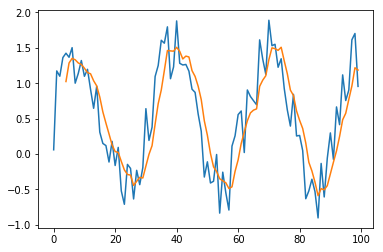

In [17]:
x=np.linspace(0,50,100)
time_series=pd.Series(np.sin(x/2.5))+np.random.rand(len(x))
import matplotlib.pylab as plt
plt.plot(time_series)
plt.plot(time_series.rolling(5).mean())

## Melt, Pivot

MELT function unpivots a DataFrame from wide format to long format, optionally leaving identifier variables set. 

It is useful when you want to have column names as values, e.g. for analysis or plotting. 

In [18]:
data = {'weekday': ["Monday", "Tuesday", "Wednesday", 
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])
df

,weekday,Person 1,Person 2,Person 3
0,Monday,12,10,8
1,Tuesday,6,6,5
2,Wednesday,5,11,7
3,Thursday,8,5,3
4,Friday,11,8,7
5,Saturday,6,9,11
6,Sunday,4,12,15


*id_vars* are columns which we would like to keep unmelted.

In [19]:
melted = pd.melt(df, id_vars=["weekday"], 
                 var_name="Person", value_name="Score")
melted.head(10)

,weekday,Person,Score
0,Monday,Person 1,12
1,Tuesday,Person 1,6
2,Wednesday,Person 1,5
3,Thursday,Person 1,8
4,Friday,Person 1,11
5,Saturday,Person 1,6
6,Sunday,Person 1,4
7,Monday,Person 2,10
8,Tuesday,Person 2,6
9,Wednesday,Person 2,11


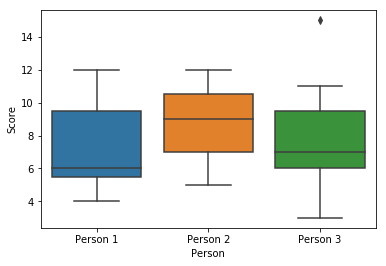

In [32]:
sns.boxplot(data = melted, x = "Person", y = "Score")

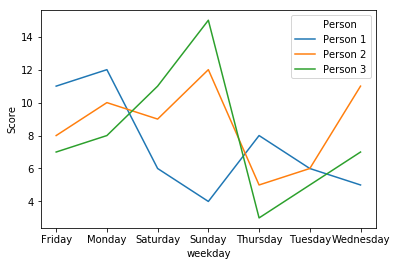

In [33]:
sns.lineplot(data = melted, hue = "Person", y = "Score",x='weekday')

We can go back to wide format from melted. In this case MultiIndex has been created

In [21]:
person_pivot = melted.pivot_table(columns = 'Person',index = 'weekday')
person_pivot

Score                  
Person    Person 1 Person 2 Person 3
weekday                             
Friday          11        8        7
Monday          12       10        8
Saturday         6        9       11
Sunday           4       12       15
Thursday         8        5        3
Tuesday          6        6        5
Wednesday        5       11        7

In [22]:
type(person_pivot.columns)

pandas.core.indexes.multi.MultiIndex

If you want to get the original table, you have to remove one level from MultiIndex on columns and reset index

In [23]:
person_pivot.columns = person_pivot.columns.droplevel(level=0)
person_pivot.reset_index()

Person,weekday,Person 1,Person 2,Person 3
0,Friday,11,8,7
1,Monday,12,10,8
2,Saturday,6,9,11
3,Sunday,4,12,15
4,Thursday,8,5,3
5,Tuesday,6,6,5
6,Wednesday,5,11,7


One can also produce a “pivot” table based on column values. *Pivot* function adds an extra layer for column names and creates MultiIndex.

One could write for example *iris_pivot['sepal length (cm)']['virginica']* in order to get particular length for particular sort of flower.

In [24]:
iris_pivot = iris_merged.pivot(columns = 'class')
iris_pivot.head()
#iris_pivot['sepal length (cm)']['virginica'].dropna()

sepal length (cm)                      sepal width (cm)             \
class            setosa versicolor virginica           setosa versicolor   
0                  10.2        NaN       NaN           3.5 cm        NaN   
1                   9.8        NaN       NaN           3.0 cm        NaN   
2                   9.4        NaN       NaN           3.2 cm        NaN   
3                   9.2        NaN       NaN           3.1 cm        NaN   
4                  10.0        NaN       NaN           3.6 cm        NaN   

                petal length (cm)                      petal width (cm)  \
class virginica            setosa versicolor virginica           setosa   
0           NaN               1.4        NaN       NaN              0.2   
1           NaN               1.4        NaN       NaN              0.2   
2           NaN               1.3        NaN       NaN              0.2   
3           NaN               1.5        NaN       NaN              0.2   
4           NaN               1.4        NaN       NaN              0.2   

                           condition                       
class versicolor virginica    setosa versicolor virginica  
0            NaN       NaN       1.4        NaN       NaN  
1            NaN       NaN       1.4        NaN       NaN  
2            NaN       NaN       NaN        NaN       NaN  
3            NaN       NaN       NaN        NaN       NaN  
4            NaN       NaN       1.4        NaN       NaN

## Direct access, iloc, values, iterrows

In my experience most of data analysis can be done with MAP,APPLY and GROUPBY. 

Although there are cases when one would like to directly access values in dataframe. 
In order to get list from dataframe one could use:

In [25]:
df1.values.tolist()

[['a', 'b', 55.0, nan, nan, Timestamp('2018-04-24 00:00:00')],
 ['a', 'b', 55.0, nan, nan, Timestamp('2018-04-24 04:00:00')],
 ['a', 'b', 55.0, nan, nan, Timestamp('2018-04-24 08:00:00')],
 ['a', 'b', 55.0, nan, nan, Timestamp('2018-04-24 12:00:00')],
 ['a', 'b', nan, 'C', 55.0, Timestamp('2018-04-24 16:00:00')],
 ['a', 'b', nan, 'C', 55.0, Timestamp('2018-04-24 20:00:00')],
 ['a', 'b', nan, 'C', 55.0, Timestamp('2018-04-25 00:00:00')]]

In [26]:
idx =df1.loc[df1['value3'].notnull()] # select by condition or labels
idx

,value1,value2,value5,value3,value4,time
0,a,b,NaN,C,55.0,2018-04-24 16:00:00
1,a,b,NaN,C,55.0,2018-04-24 20:00:00
2,a,b,NaN,C,55.0,2018-04-25 00:00:00


In [27]:
df3 = df1[~df1['value3'].isin(['C']) ] # select by condition
df3

,value1,value2,value5,value3,value4,time
0,a,b,55.0,NaN,NaN,2018-04-24 00:00:00
1,a,b,55.0,NaN,NaN,2018-04-24 04:00:00
2,a,b,55.0,NaN,NaN,2018-04-24 08:00:00
3,a,b,55.0,NaN,NaN,2018-04-24 12:00:00


In [28]:
df1.iloc[:5] # select by row numbers

,value1,value2,value5,value3,value4,time
0,a,b,55.0,NaN,NaN,2018-04-24 00:00:00
1,a,b,55.0,NaN,NaN,2018-04-24 04:00:00
2,a,b,55.0,NaN,NaN,2018-04-24 08:00:00
3,a,b,55.0,NaN,NaN,2018-04-24 12:00:00
0,a,b,NaN,C,55.0,2018-04-24 16:00:00


In [29]:
for index,row in df1.iterrows(): # loop through
    print(row['value5'])

55.0
55.0
55.0
55.0
nan
nan
nan
